## IMPORTING MODULES

In [6]:
!pip install tensorflow==2.2.0

Unable to create process using 'C:\Users\PRAKHAR KR SINGH\anaconda3\python.exe "C:\Users\PRAKHAR KR SINGH\anaconda3\Scripts\pip-script.py" install tensorflow==2.2.0'


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from turtle import color

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.combine import SMOTETomek

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix,mean_squared_error)

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

C:\Users\PRAKHAR KR SINGH\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



ModuleNotFoundError: No module named 'tensorflow'

## READING CSV

In [2]:
df = pd.read_csv("bully_final.csv")

In [3]:
df.head()

,Unnamed: 0,What is your age ?,What is your gender ?,Which type of bullying have you done ?,What is the reason for your past behaviour of bullying?,Location where you engaged in the act of bullying,Victims' identity:,What was your response after you engaged in bullying?,How do you perceive the severity of the bullying you engaged in ?,Consequences of bullying,Will you still bully others in the future ?
0,0,26,Prefer not to say,Verbal Bullying,Jealousy,School/College,Friends & Family,Continued to bully,High,Hampered interpersonal relationship,No
1,1,28,Female,Cyber Bullying,Boredom,Social Media,Strangers,Continued to bully,High,No consequence,No
2,2,22,Prefer not to say,Physical Bullying,Lack of empathy,School/College,Friends & Family,Continued to bully,Moderate,Hampered interpersonal relationship,No
3,3,26,Male,Physical Bullying,Lack of empathy,Public Places,Strangers,Regretted,Moderate,Hampered interpersonal relationship,Yes
4,4,15,Prefer not to say,Cyber Bullying,Jealousy,Neighbourhood,Strangers,Continued to bully,High,Hampered interpersonal relationship,Yes


In [4]:
df.drop("Unnamed: 0", inplace=True, axis = 1) #REMOVING THE UNNECESSARY COLUMNS

In [5]:
df.head()

,What is your age ?,What is your gender ?,Which type of bullying have you done ?,What is the reason for your past behaviour of bullying?,Location where you engaged in the act of bullying,Victims' identity:,What was your response after you engaged in bullying?,How do you perceive the severity of the bullying you engaged in ?,Consequences of bullying,Will you still bully others in the future ?
0,26,Prefer not to say,Verbal Bullying,Jealousy,School/College,Friends & Family,Continued to bully,High,Hampered interpersonal relationship,No
1,28,Female,Cyber Bullying,Boredom,Social Media,Strangers,Continued to bully,High,No consequence,No
2,22,Prefer not to say,Physical Bullying,Lack of empathy,School/College,Friends & Family,Continued to bully,Moderate,Hampered interpersonal relationship,No
3,26,Male,Physical Bullying,Lack of empathy,Public Places,Strangers,Regretted,Moderate,Hampered interpersonal relationship,Yes
4,15,Prefer not to say,Cyber Bullying,Jealousy,Neighbourhood,Strangers,Continued to bully,High,Hampered interpersonal relationship,Yes


Text(0.5, 0, '\n\n\nWill you still bully others in the future ?')

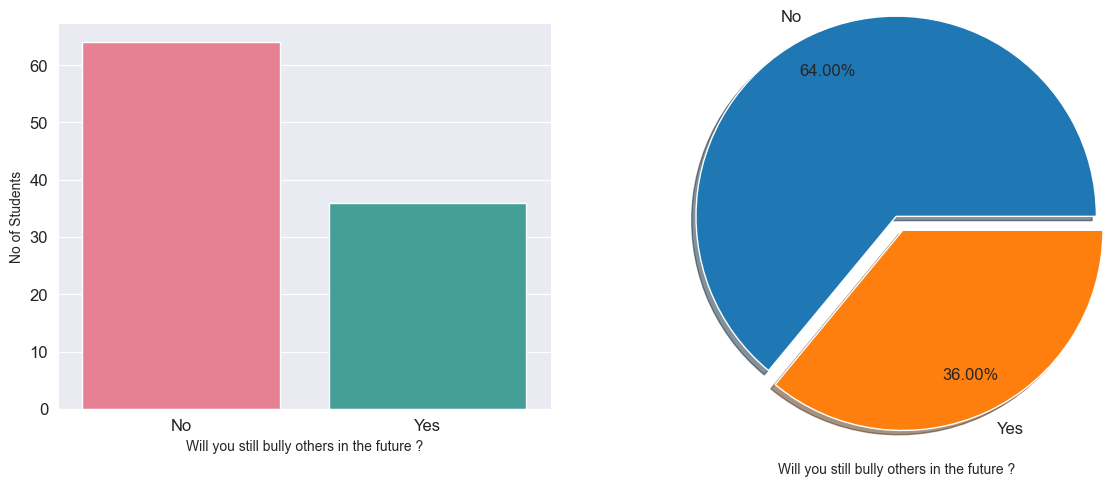

In [6]:
plt.figure(figsize=(14,5))

#barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["Will you still bully others in the future ?"],palette='husl')
ax1.set_xlabel("Will you still bully others in the future ?")
ax1.set_ylabel("No of Students")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

# pieplot
ax2 = plt.subplot(1,2,2)
explode=[0,0.1]
plt.pie(df["Will you still bully others in the future ?"].value_counts(),
        labels=list(df["Will you still bully others in the future ?"].unique()),
        explode=explode,
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':12},
   )
ax2.set_xlabel("\n\n\nWill you still bully others in the future ?")

(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30')])

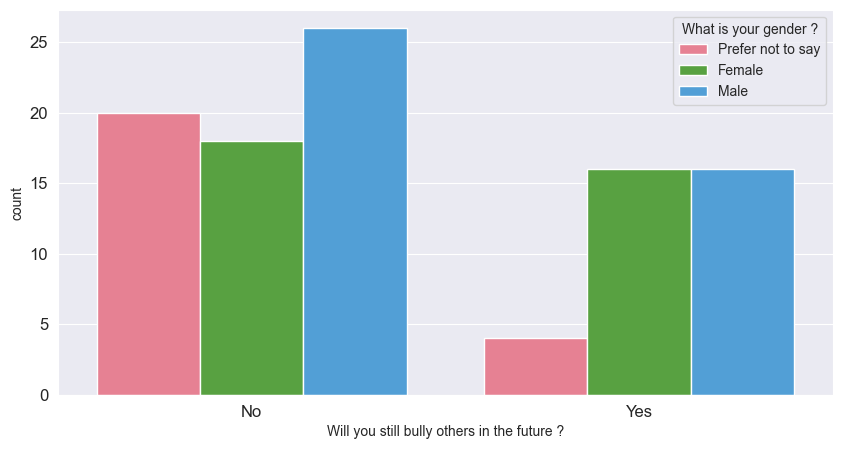

In [7]:
plt.figure(figsize=(10,5))

#barplot
cp = sns.countplot(x=df["Will you still bully others in the future ?"],hue=df['What is your gender ?'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 17.5, '17.5'),
  Text(0, 20.0, '20.0')])

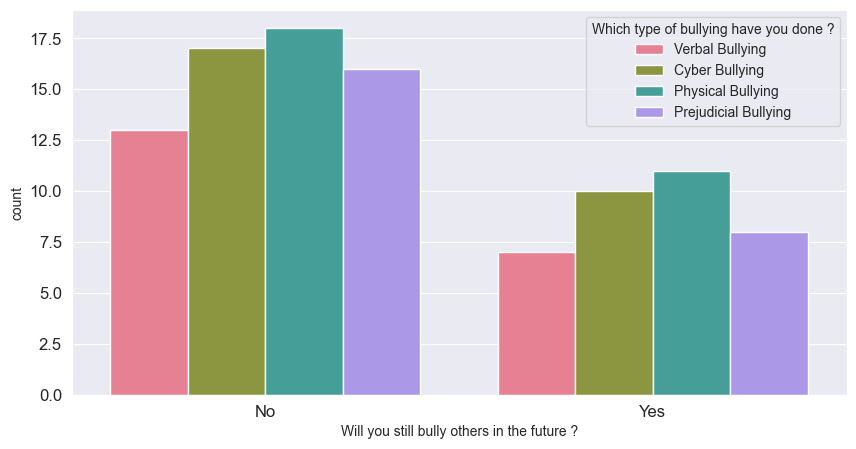

In [8]:
plt.figure(figsize=(10,5))

#barplot
cp = sns.countplot(x=df["Will you still bully others in the future ?"],hue=df['Which type of bullying have you done ?'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12'),
  Text(0, 14.0, '14'),
  Text(0, 16.0, '16'),
  Text(0, 18.0, '18')])

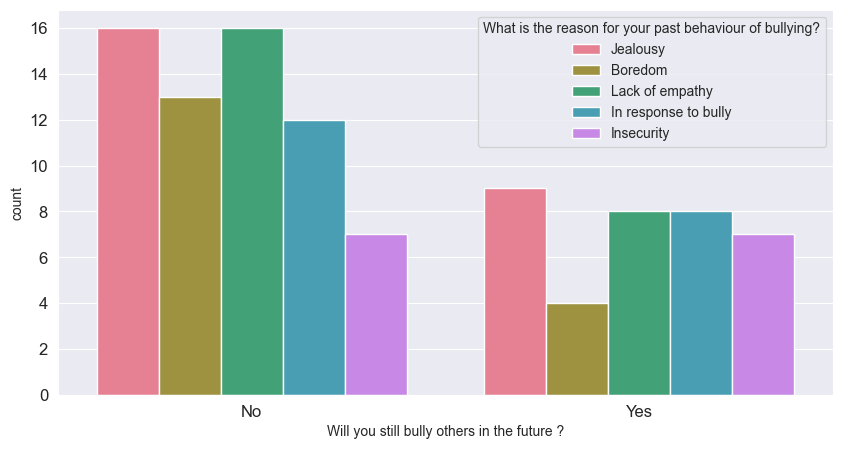

In [9]:
plt.figure(figsize=(10,5))

#barplot
cp = sns.countplot(x=df["Will you still bully others in the future ?"],hue=df['What is the reason for your past behaviour of bullying?'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 17.5, '17.5'),
  Text(0, 20.0, '20.0'),
  Text(0, 22.5, '22.5')])

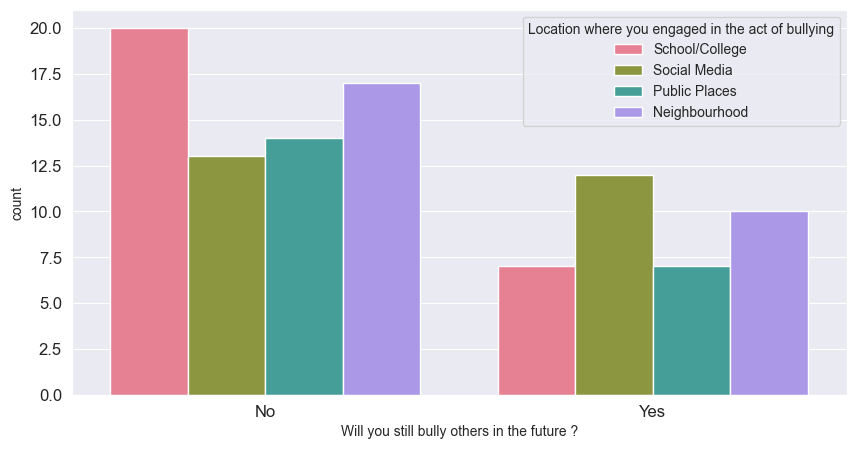

In [10]:
plt.figure(figsize=(10,5))

#barplot
cp = sns.countplot(x=df["Will you still bully others in the future ?"],hue=df['Location where you engaged in the act of bullying'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30')])

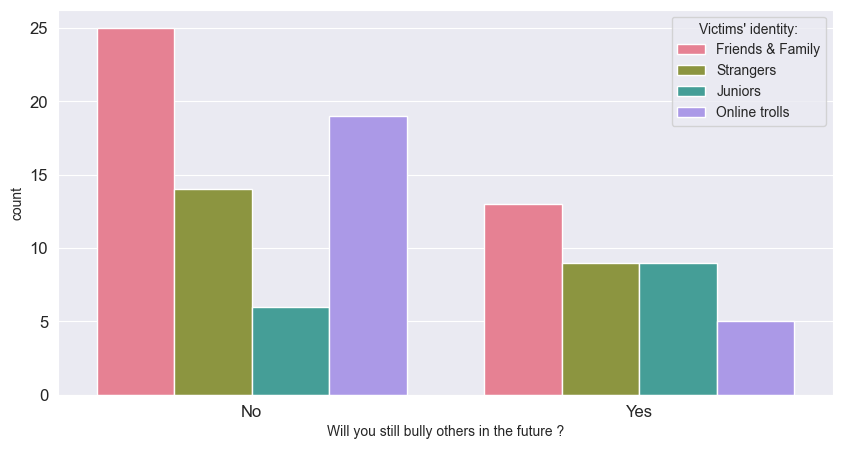

In [11]:
plt.figure(figsize=(10,5))

#barplot
cp = sns.countplot(x=df["Will you still bully others in the future ?"],hue=df['Victims\' identity:'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30'),
  Text(0, 35.0, '35'),
  Text(0, 40.0, '40')])

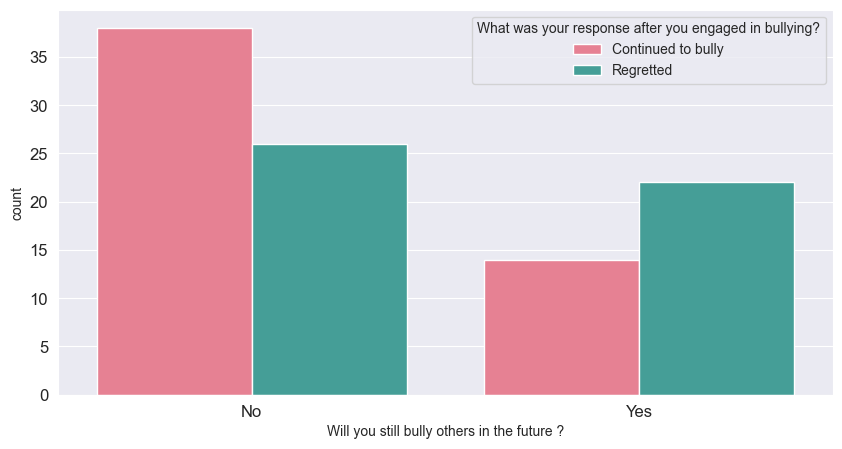

In [12]:
plt.figure(figsize=(10,5))

#barplot
cp = sns.countplot(x=df["Will you still bully others in the future ?"],hue=df['What was your response after you engaged in bullying?'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30')])

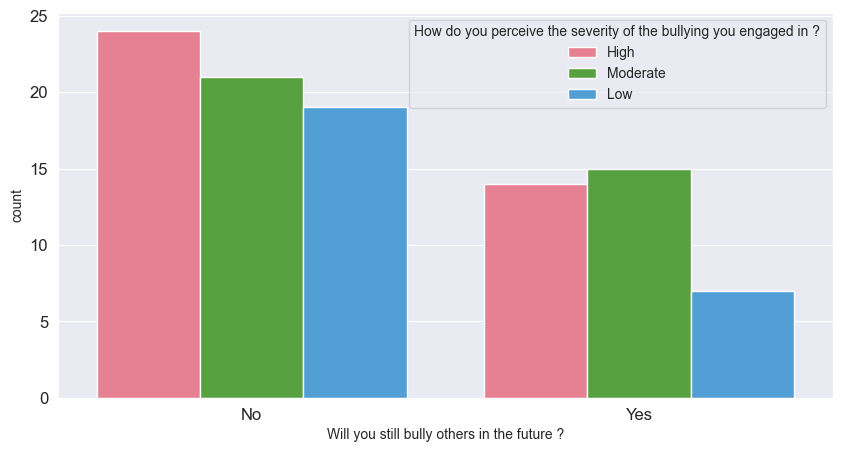

In [13]:
plt.figure(figsize=(10,5))

#barplot
cp = sns.countplot(x=df["Will you still bully others in the future ?"],hue=df['How do you perceive the severity of the bullying you engaged in ?'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [14]:
#plt.figure(figsize=(10,5))

#barplot
#cp = sns.countplot(x=df["Will you still bully others in the future ?"],hue=df['Consequences of bullying'],palette='husl')
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)

## CHECKING FOR MISSING VALUES

In [15]:
def missing_values_table(df):
        # Total missing values by column
        mis_val = df.isnull().sum()
        
        # Percentage of missing values by column
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # build a table with the thw columns
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [16]:
missing_values_table(df)

Your selected dataframe has 10 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## ENCODING THE CATEGORICAL VARIABLES

In [17]:
cat_cols=[i for i in df.columns if df[i].dtype=='object']
le=LabelEncoder()
for col in cat_cols:
    df[col]=le.fit_transform(df[col])

In [18]:
df.head() 

,What is your age ?,What is your gender ?,Which type of bullying have you done ?,What is the reason for your past behaviour of bullying?,Location where you engaged in the act of bullying,Victims' identity:,What was your response after you engaged in bullying?,How do you perceive the severity of the bullying you engaged in ?,Consequences of bullying,Will you still bully others in the future ?
0,26,2,3,3,2,0,0,0,1,0
1,28,0,0,0,3,3,0,0,3,0
2,22,2,1,4,2,0,0,2,1,0
3,26,1,1,4,1,3,1,2,1,1
4,15,2,0,3,0,3,0,0,1,1


## SEPARATING TARGET VARIABLES FROM OTHER FEATURES

In [19]:
x=df.copy()
y=x.pop('Will you still bully others in the future ?')

## TRAIN TEST SPLIT

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,test_size=0.25,random_state=42)

## RESAMPLING THE TRAINING DATA

In [21]:
#Random minority oversampling followed by undersampling
smt = SMOTETomek(random_state=42)
x_train, y_train = smt.fit_resample(x_train, y_train)

## BULDING THE NEURAL NETWORK

In [42]:
model=Sequential()
model.add(Dense(64,input_shape=(9,),activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='relu'))
# model.add(Dense(8,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [43]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [44]:
model.fit(x_train, y_train,
          batch_size=16,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/100
5/5 [==============================] - 1s 51ms/step - loss: 0.7599 - accuracy: 0.4868 - val_loss: 0.7139 - val_accuracy: 0.2400
Epoch 2/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6971 - accuracy: 0.3553 - val_loss: 0.6964 - val_accuracy: 0.6400
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 0.7047 - accuracy: 0.5395 - val_loss: 0.7715 - val_accuracy: 0.2000
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: 0.7007 - accuracy: 0.5921 - val_loss: 0.6946 - val_accuracy: 0.6400
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 0.7056 - accuracy: 0.5132 - val_loss: 0.7146 - val_accuracy: 0.3200
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 0.6870 - accuracy: 0.5395 - val_loss: 0.6915 - val_accuracy: 0.7600
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6913 - val_accuracy: 0.7600
Epoch 8/100
5/5 [===